In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#
import sys
import os
sys.path.append(os.path.abspath('..'))

In [14]:
from scripts.insurance_data_analysis import InsuranceDataAnalysis

In [4]:
#read the data
df=pd.read_csv('../data/insurance_data.csv')

In [5]:
df

,Unnamed: 0,Province,Zipcode,Gender,Total_Claim,Premium
0,0,C,1003,Female,652.740226,898.493109
1,1,A,1003,Female,1159.389368,1040.563548
2,2,C,1003,Male,729.641413,1137.593249
3,3,C,1003,Female,253.524198,764.332164
4,4,A,1001,Male,938.056933,1349.828367
...,...,...,...,...,...,...
995,995,B,1001,Female,1099.492601,1115.364997
996,996,B,1003,Female,877.886857,1250.101777
997,997,C,1002,Female,776.679394,1090.145906
998,998,C,1003,Male,649.706237,1109.161280


In [18]:
# Create a summary of the dataset
def data_summarization(df):
    print("\n--- Data Types ---")
    print(df.dtypes)

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Descriptive Statistics ---")
    print(df.describe())

    print("\n--- Data Sample ---")
    print(df.head())

data_summarization(df)


--- Data Types ---
Unnamed: 0                  int64
Province                   object
Zipcode                     int64
Gender                     object
Total_Claim               float64
Premium                   float64
Premium_to_Claim_Ratio    float64
dtype: object

--- Missing Values ---
Unnamed: 0                0
Province                  0
Zipcode                   0
Gender                    0
Total_Claim               0
Premium                   0
Premium_to_Claim_Ratio    0
dtype: int64

--- Descriptive Statistics ---
        Unnamed: 0      Zipcode  Total_Claim      Premium  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean    499.500000  1001.999000   931.049722  1112.742919   
std     288.819436     0.817109   566.679835   198.269534   
min       0.000000  1001.000000    27.339840   527.702050   
25%     249.750000  1001.000000   513.545195   984.410128   
50%     499.500000  1002.000000   816.332296  1115.189886   
75%     749.250000  1003.000000  122

In [6]:
# Initialize the analysis class
analysis = InsuranceDataAnalysis(df)

In [7]:
# Generate descriptive statistics
grouped_stats = analysis.descriptive_statistics()
grouped_stats

,Province,Gender,Avg_Total_Claim,Avg_Premium,Count
0,A,Female,954.963478,1138.268025,176
1,A,Male,1039.683077,1136.346317,179
2,B,Female,904.853268,1242.241531,170
3,B,Male,1024.256636,1223.969924,156
4,C,Female,739.589271,956.303706,165
5,C,Male,917.088046,968.125168,154


In [22]:
# Data Quality Assessment: Missing values
missing_values = df.isnull().sum()
print("\n--- Missing Values ---")
print(missing_values)


--- Missing Values ---
Unnamed: 0                0
Province                  0
Zipcode                   0
Gender                    0
Total_Claim               0
Premium                   0
Premium_to_Claim_Ratio    0
dtype: int64


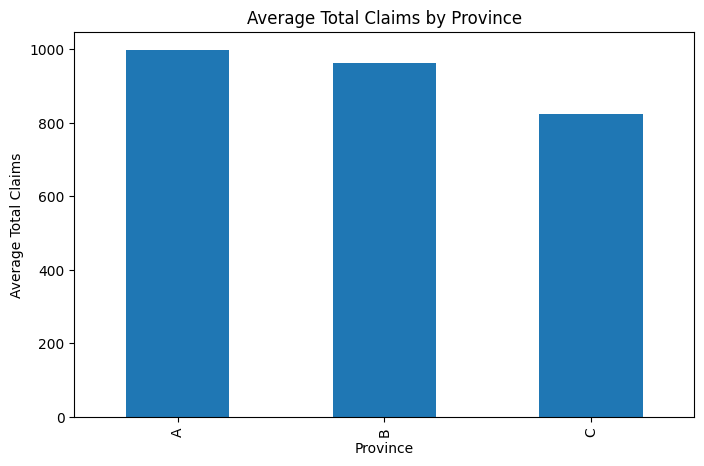

In [8]:
# Visualize total claims by province
analysis.visualize_total_claims_by_province()

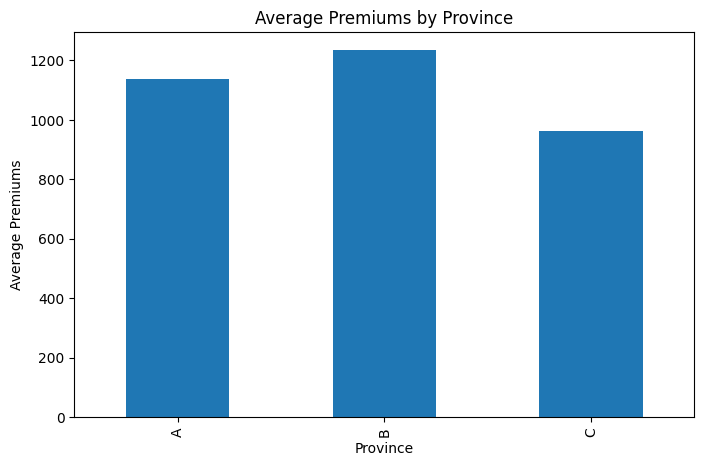

In [9]:
# Visualize premiums by province
analysis.visualize_premiums_by_province()

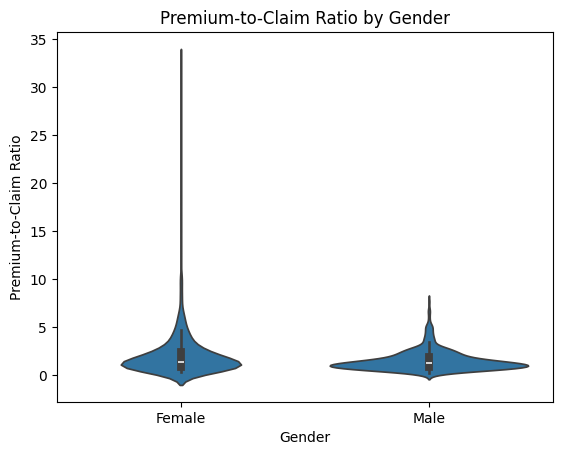

In [10]:
# Visualize premium-to-claim ratio by gender
analysis.visualize_premium_to_claim_ratio_by_gender()

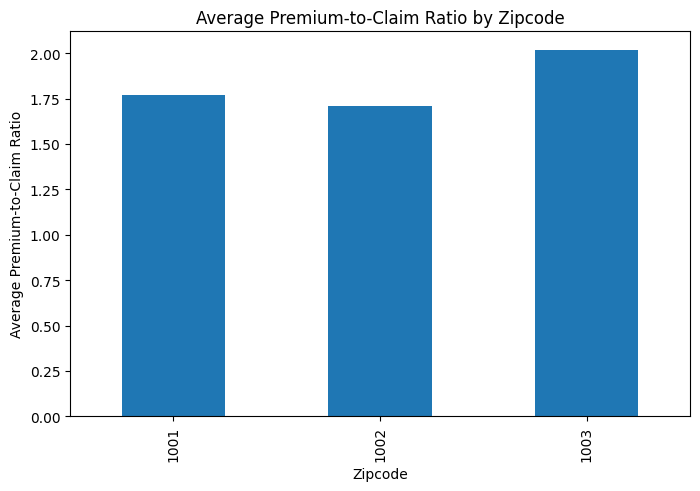

In [11]:
# Visualize premium-to-claim ratio by zipcode
analysis.visualize_premium_to_claim_ratio_by_zipcode()

In [26]:
#Data Quality Assessment: Missing values
missing_values = df.isnull().sum()
print("\n--- Missing Values ---")
print(missing_values)


--- Missing Values ---
Unnamed: 0                0
Province                  0
Zipcode                   0
Gender                    0
Total_Claim               0
Premium                   0
Premium_to_Claim_Ratio    0
dtype: int64


In [12]:
# Highlight profitable segments
profitable_segments = analysis.highlight_profitable_segments()
profitable_segments

,Province,Gender,Avg_Ratio,Count
0,A,Female,1.636719,176
2,B,Female,2.373550,170
3,B,Male,1.725889,156
4,C,Female,2.327555,165
5,C,Male,1.569159,154


In [13]:
# Identify low-risk targets
low_risk_targets = analysis.identify_low_risk_targets()
low_risk_targets

,Province,Gender,Avg_Total_Claim
2,B,Female,904.853268
4,C,Female,739.589271
5,C,Male,917.088046


In [28]:
# Descriptive Statistics for numerical features
numerical_features = ['Total_Claim', 'Premium']  # Adjusted for the sample data
variability = df[numerical_features].std()
print("\n--- Variability in Numerical Features ---")
print(variability)


--- Variability in Numerical Features ---
Total_Claim    566.679835
Premium        198.269534
dtype: float64


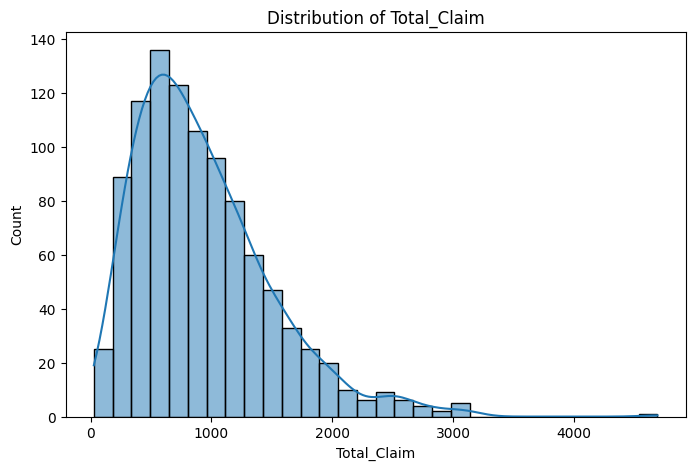

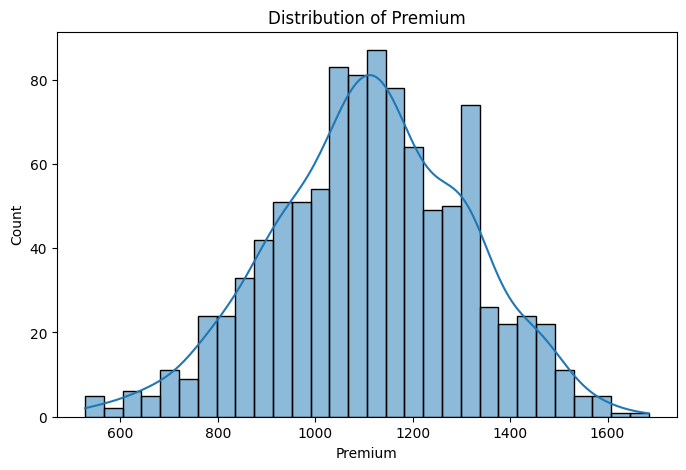

In [30]:
# Univariate Analysis: Distribution of Variables
for column in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

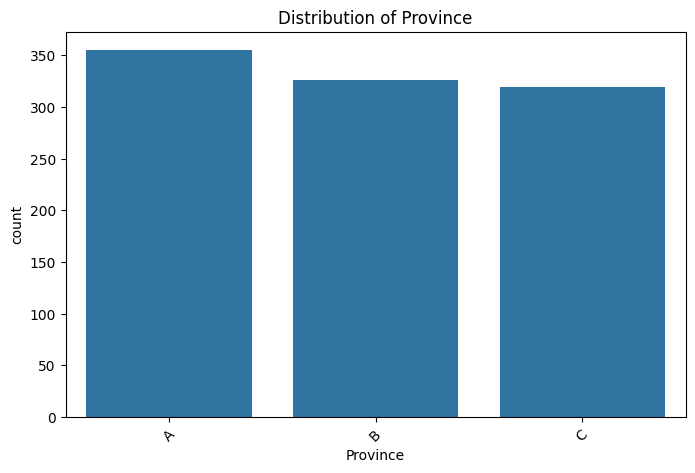

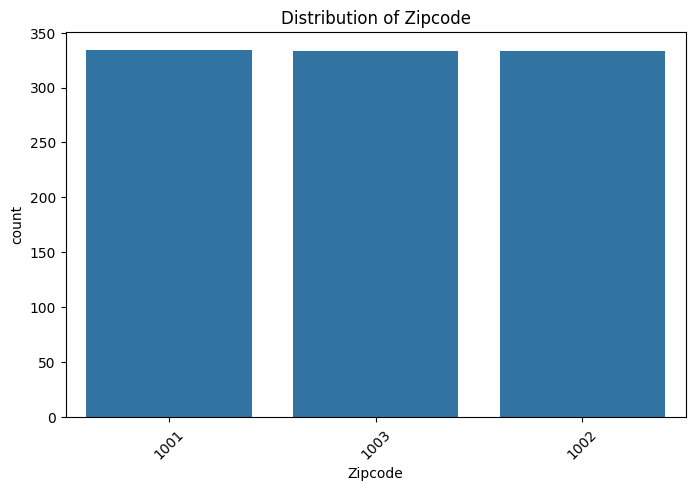

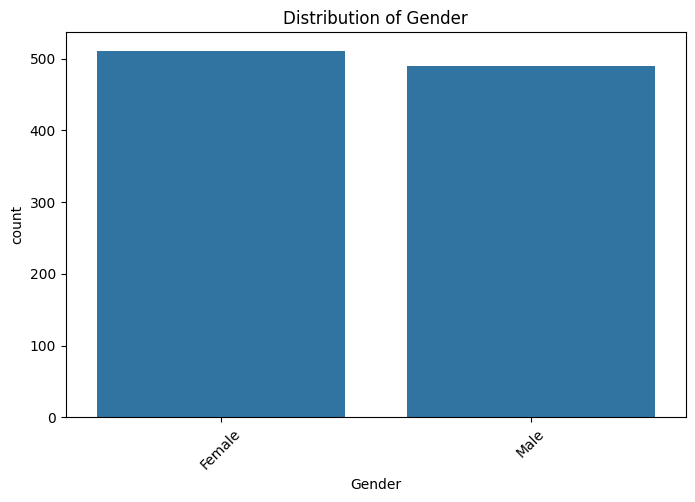

In [32]:
categorical_features = ['Province', 'Zipcode', 'Gender']  # Adjusted for the sample data
for column in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [33]:
# Bivariate Analysis: Correlations
correlation_data = df[numerical_features]
correlation_matrix = correlation_data.corr()
print("\n--- Correlation Matrix ---")
print(correlation_matrix)


--- Correlation Matrix ---
             Total_Claim   Premium
Total_Claim     1.000000  0.036142
Premium         0.036142  1.000000


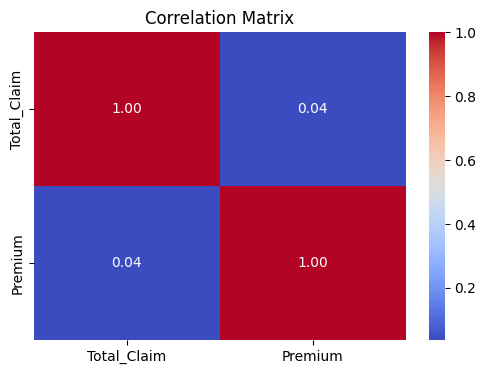

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

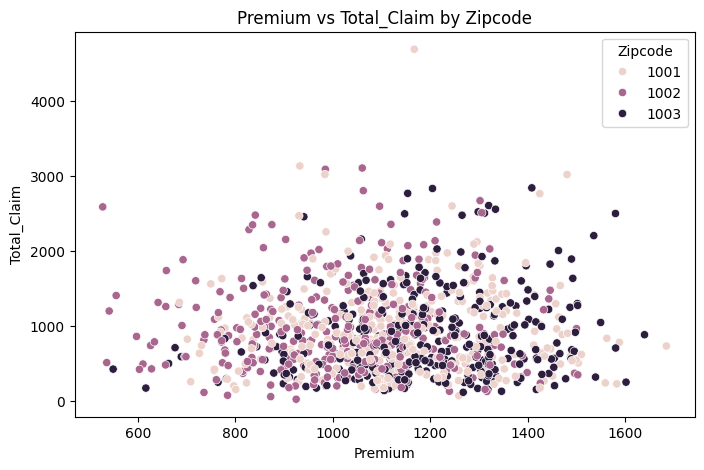

In [35]:
# Scatter Plot: Premium vs. Total_Claim grouped by Zipcode
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Premium', y='Total_Claim', hue='Zipcode', data=df)
plt.title('Premium vs Total_Claim by Zipcode')
plt.show()

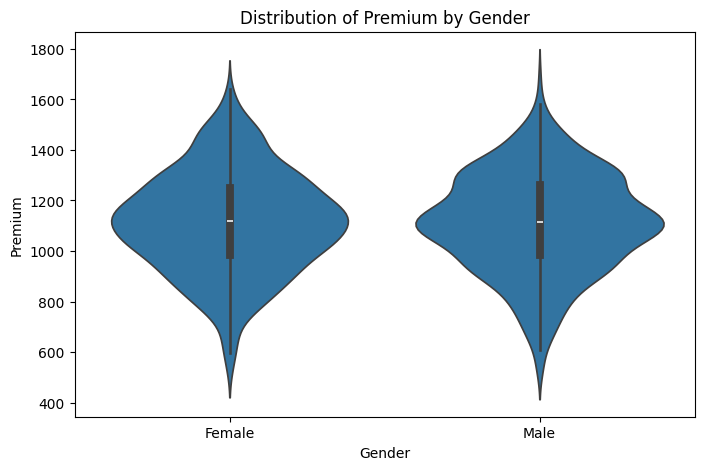

In [38]:
# Creative Plots
# 1. Violin Plot for Premium by Gender
plt.figure(figsize=(8, 5))
sns.violinplot(x='Gender', y='Premium', data=df)
plt.title('Distribution of Premium by Gender')
plt.show()

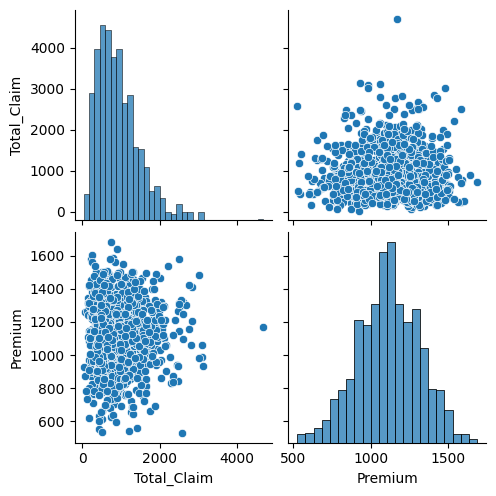

In [39]:
# 2. Pair Plot for Numerical Features
sns.pairplot(df[numerical_features])
plt.show()

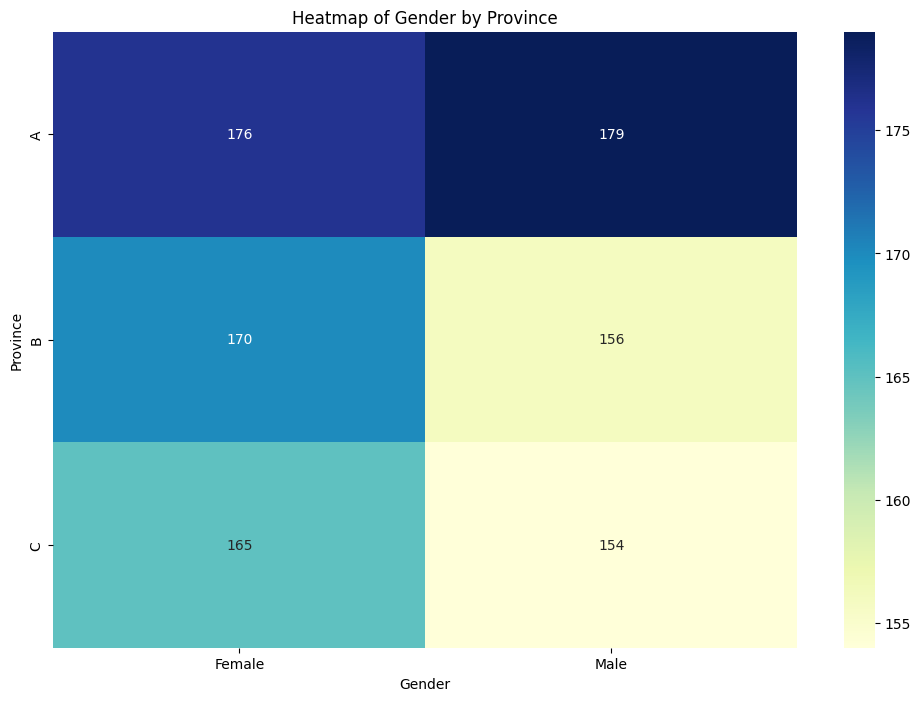

In [41]:

# 3. Heatmap for Province and Gender Aggregates
province_gender_heatmap = pd.crosstab(df['Province'], df['Gender'])
plt.figure(figsize=(12, 8))
sns.heatmap(province_gender_heatmap, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Gender by Province')
plt.show()